In [93]:
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# import time
# from datetime import datetime, timedelta

In [94]:
input_name = input("Enter Youtuber's Name: ")

list_name = input_name.split()

converted_name = input_name

if len(list_name) > 1:
    
    converted_name = ""
    
    for i in range(len(list_name)):

        converted_name = converted_name + list_name[i]
        
        if i != len(list_name)-1:
            converted_name = converted_name + "+"

search_name = converted_name

start_url = "https://www.youtube.com/results?search_query=" + search_name

Enter Youtuber's Name: gibi asmr


In [95]:
get_youtube_url_response = requests.get(start_url)

In [96]:
youtube_name_soup = bs(get_youtube_url_response.text, "lxml")

In [97]:
raw_youtube_name_link = youtube_name_soup.find_all("div", class_="yt-lockup-byline")[0].a.get("href")

final_youtube_name_link = "https://www.youtube.com" + raw_youtube_name_link + "/videos"

In [98]:
# Youtuber's Videos URL
url = final_youtube_name_link

In [99]:
# Get Response
response = requests.get(url)

In [100]:
# Create Soup Object
soup = bs(response.text, 'lxml')

In [101]:
# Extract Data
meta = soup.find_all('ul', class_='yt-lockup-meta-info')
titles = soup.find_all('h3', class_='yt-lockup-title')
durations = soup.find_all('span', class_ = "video-time")
links = soup.find_all('h3', class_='yt-lockup-title')

In [102]:
# Get all URLs in a list
urls = []

for link in links: 

    url = link.a.get("href")
    
    urls.append("https://www.youtube.com" + url)

In [103]:
# Get all Durations in a list
duration_videos = []

for duration in durations:
    
    duration_time = duration.text
    
    duration_videos.append(duration_time)

In [104]:
# Get all Titles in a list
title_videos = []

for title in titles:
    
    title_text = title.find('a').text
    
    title_videos.append(title_text)   

In [105]:
# Get all Views and Dates in two lists
views = []
date = []

for data in meta:
    
    meta_data = data.find_all("li")

    string_views = meta_data[0].text.split(" ")[0]
    
    int_views = int(string_views.replace(",",""))
    
    views.append(int_views)

In [106]:
# Going to Each Videos and Extracting Data
published_on = []

for i in range(len(urls)):
    
    video_url = urls[i]
    
    video_response = requests.get(video_url)
    
    video_soup = bs(video_response.text, 'lxml')
    
    raw_publish_date = video_soup.find("strong",class_="watch-time-text").text
    
    if raw_publish_date.split(" ")[0] == "Published":
        
        publish_date = raw_publish_date.split(" ")[2:5]

        publish_date_format = " ".join(publish_date)

        published_on.append(publish_date_format)
    
    elif raw_publish_date.split(" ")[0] == "Premiered":
        
        publish_date = raw_publish_date.split(" ")[1:4]

        publish_date_format = " ".join(publish_date)

        published_on.append(publish_date_format)
    

In [107]:
# Create DataFrame
df = pd.DataFrame({"Date": published_on,
                   "Title" : title_videos,
                   "Duration" : duration_videos,
                   "Views" : views,
                   "URL" : urls
                  })

df = df.sort_values("Date",ascending=True).reindex()
df

Date                                              Title Duration  \
3    Dec 1, 2018  [ASMR] Whispered Farm Simulator Gameplay {Typi...    43:00   
2    Dec 4, 2018  [ASMR] Big Sister Reads You to Sleep During a ...    29:35   
1    Dec 6, 2018  [ASMR] Unwrapping Wooden Triggers ♡ (Soft Spok...    41:30   
0    Dec 8, 2018  [ASMR] Happy Christmas Song Humming for Sleep ❄️🎄    19:20   
17   Nov 1, 2018  [ASMR] Big Sister Reads You to Sleep During a ...    44:23   
13  Nov 10, 2018  Exploring ASMR Objects with an ASMRtist {ft. A...    25:49   
12  Nov 13, 2018                          [ASMR] The Gaming Store 4    35:00   
11  Nov 15, 2018                      [ASMR] Soft Spoken Wig Try-On    26:22   
10  Nov 17, 2018      [ASMR] In-Home Eye Exam & Contact Appointment    19:49   
9   Nov 20, 2018  [ASMR] Making a Hand Turkey ♡ Scissor Snipping...    36:09   
8   Nov 22, 2018  [ASMR] Gibi & Fast ASMR: German 🇩🇪 vs American...    35:56   
7   Nov 24, 2018        [ASMR] Daphne Interrogates You | Scooby Doo    22:14   
6   Nov 26, 2018  800+ Reese Mountain!! 🧡 ASMR Triggers for Deli...    19:39   
5   Nov 27, 2018  [ASMR] (No Talking) Soft Face and Ear Brushing...    22:47   
4   Nov 29, 2018  [ASMR] Ear Massage and Brushing (Whispered Clo...    25:55   
16   Nov 4, 2018  Slow Cozy Tapping & Scratching | Whispered ASM...    38:12   
15   Nov 6, 2018   Gibi & Frivvi Take Care of You at a Party [ASMR]    16:27   
14   Nov 8, 2018  [ASMR] Japanese Convenience Store Checkout wit...    16:33   
26  Oct 11, 2018  Not-So-ASMR Bloopers (Part 5) [Adult Language ⚠️]     4:49   
25  Oct 13, 2018  Top Triggers for Sleep and Relaxation ~ 3Dio S...    22:28   
24  Oct 16, 2018                      [ASMR] Whispered Wig Try-On ♡    27:44   
23  Oct 18, 2018      [ASMR] Cooking with Gibi - Mexican Beef Bowls    23:05   
22  Oct 20, 2018      New Tingly Trigger Items for ASMR (Whispered)    26:08   
21  Oct 23, 2018      [ASMR] Tracing & Tapping on My Art Collection    43:42   
20  Oct 25, 2018    Mochi Ice Cream & Macarons | ASMR Chat & Eating    35:06   
19  Oct 27, 2018      [ASMR] Ninja Trials in the Forest (Whispered)    32:39   
18  Oct 30, 2018  ASMR Typing on 3 Different Keyboards [Black Wi...    30:59   
29   Oct 4, 2018        ASMR Equipment Shop - Tingly Items for Sale    30:21   
28   Oct 6, 2018  Angelic Triggers 🕊️ Gentle Sounds & Whispers f...    24:47   
27   Oct 9, 2018  Devilish Triggers 😈 Firey Soft Spoken Triggers...    25:22   

      Views                                          URL  
3    271427  https://www.youtube.com/watch?v=U5k9Dff4voY  
2    186500  https://www.youtube.com/watch?v=Fg9mdZvT-_U  
1    306250  https://www.youtube.com/watch?v=doS3YF55xX4  
0    120359  https://www.youtube.com/watch?v=M0xRCrqaffA  
17   298812  https://www.youtube.com/watch?v=cv3LH8x9yM0  
13   359326  https://www.youtube.com/watch?v=2cs5mhZTlYA  
12   925668  https://www.youtube.com/watch?v=rH8KWADhriA  
11   361114  https://www.youtube.com/watch?v=ySbCtJPeo3Y  
10   704620  https://www.youtube.com/watch?v=s__lrPUJj24  
9    494247  https://www.youtube.com/watch?v=s4rAhZ-o2t8  
8    433337  https://www.youtube.com/watch?v=jRY4GAYR4rA  
7    588963  https://www.youtube.com/watch?v=NrxIxEzyg90  
6    706507  https://www.youtube.com/watch?v=GYgQrnvzNeo  
5    462295  https://www.youtube.com/watch?v=nv7gnnRQvS0  
4    919106  https://www.youtube.com/watch?v=cu3sm0rmDQY  
16  1332986  https://www.youtube.com/watch?v=vZ5R1wr_xO8  
15   970408  https://www.youtube.com/watch?v=Mx0Q0ZEzYQY  
14   553073  https://www.youtube.com/watch?v=3yzhzBpPg6s  
26   839718  https://www.youtube.com/watch?v=_8HiTB_K0jo  
25  1145550  https://www.youtube.com/watch?v=KyWbYFLT9ys  
24   522003  https://www.youtube.com/watch?v=zIYuEOdPNV8  
23   347999  https://www.youtube.com/watch?v=FQkDEbgIXFo  
22   826774  https://www.youtube.com/watch?v=3lVG6mnCuJw  
21   419835  https://www.youtube.com/watch?v=VsKrXG-j2E0  
20   913293  https://www.youtube.com/watch?v=6nGeE-18kog

In [110]:
(df.Views.sum()/1000000)*2000

41997.329999999994

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

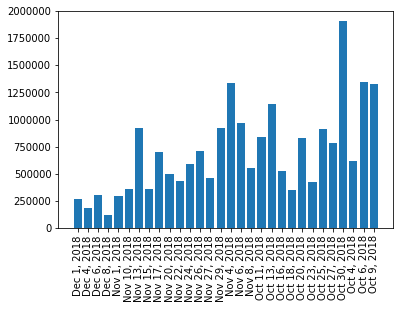

In [109]:
# Graph Data
plt.bar(np.arange(0,len(df),1),df["Views"], tick_label = df["Date"])
plt.xticks(rotation=90)